 Exploration des données

Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = "C:/Users/Hippolyte_Geslain/Documents/LaPlateforme/B2/Repos/dazzle-dash/data/Life Expectancy Data.csv"
df = pd.read_csv(file_path)
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [7]:
df.info()

df.describe()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

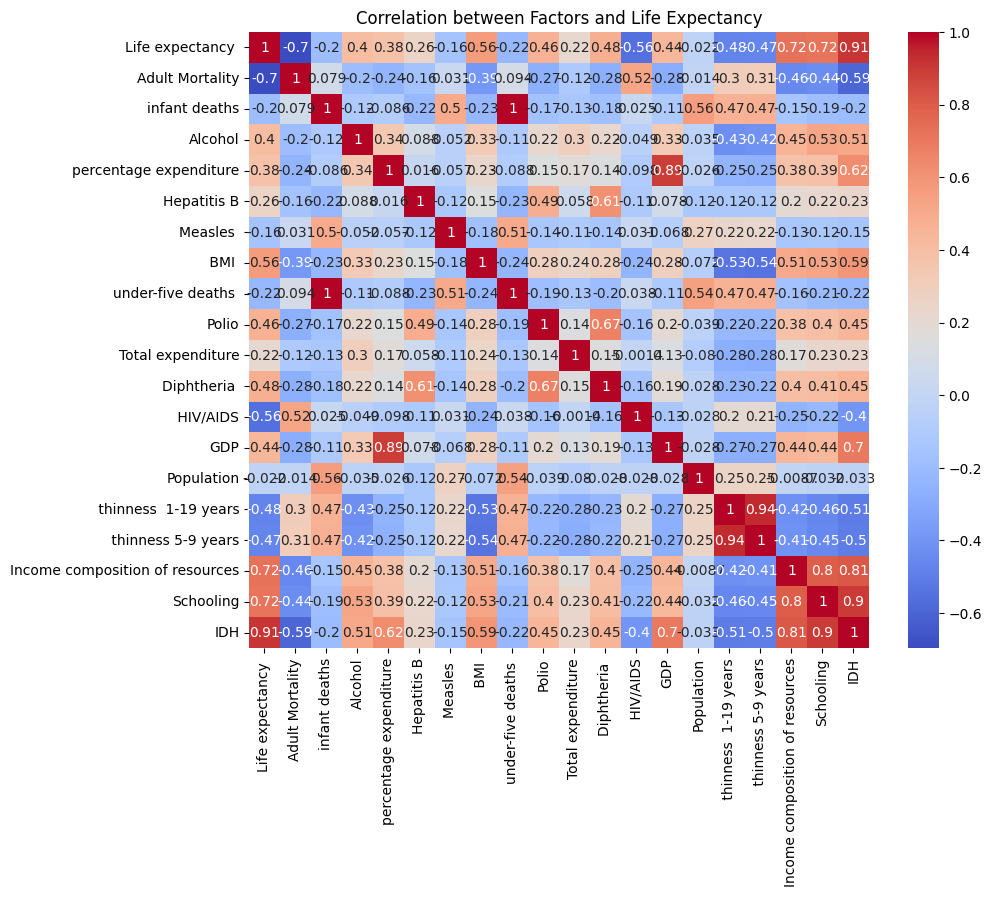

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import colors

df = pd.read_csv('data/Life Expectancy Data with Imputed Values.csv')

# Heatmap: Correlation between factors and Life Expectancy
corr_matrix = df[['Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'IDH']].corr()

# Build a custom colormap that keeps values between -0.4 and 0.4 as a flat gray band
vmin = corr_matrix.min().min()
vmax = corr_matrix.max().max()

# Sizes for each segment (adjust for smoothness)
N_neg = 128   # gradient for negative correlations (< -0.4)
N_mid = 32    # flat gray band (-0.4 .. 0.4)
N_pos = 128   # gradient for positive correlations (> 0.4)
N_total = N_neg + N_mid + N_pos

# Create color segments
neg_colors = plt.cm.Blues_r(np.linspace(0, 1, N_neg))       # strong negative -> blue
mid_color = np.tile(np.array([[0.8, 0.8, 0.8, 1.0]]), (N_mid, 1))  # flat gray
pos_colors = plt.cm.Reds(np.linspace(0, 1, N_pos))         # strong positive -> red

colors_list = np.vstack([neg_colors, mid_color, pos_colors])
custom_cmap = colors.ListedColormap(colors_list)

# Create boundaries so that the central -0.4..0.4 range maps to the mid_color bins
bounds = np.linspace(vmin, vmax, N_total + 1)
norm = colors.BoundaryNorm(bounds, custom_cmap.N)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap=custom_cmap, norm=norm, annot=True, cbar=True, square=True,
            linewidths=0.5, linecolor='white', fmt=".2f")
plt.title('Correlation between Factors and Life Expectancy (middle [-0.4,0.4] = gray)')
plt.show()

In [3]:

import pandas as pd
import numpy as np

# Use absolute path to ensure correct file location
csv_path = 'c:/Users/Cycrustmine/laplateforme/B2/Repos/dazzle-dash/data/Life Expectancy Data with IDH and Imputed Values.csv'

# Read existing data
df = pd.read_csv(csv_path)

# Remove any existing 'World' entries to avoid duplicates
df = df[df['Country'] != 'World']

# Get column types for non-object columns
dtypes = {col: df[col].dtype for col in df.columns 
          if df[col].dtype != 'object'}

# Identify numeric columns for averaging (exclude Year and Population)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['Year', 'Population']]

# Create world rows for each year
years = sorted(df['Year'].unique())
world_rows = []

for year in years:
    year_data = df[df['Year'] == year].copy()
    
    # Calculate world metrics
    world_row = {
        'Country': 'World',
        'Year': year,
        'Status': 'World'
    }
    
    # Handle Population sum separately, counting only non-null values
    valid_population = year_data['Population'].dropna()
    world_row['Population'] = valid_population.sum()
    
    # Calculate means for other numeric columns, handling missing values
    for col in numeric_cols:
        valid_data = year_data[col].dropna()
        if len(valid_data) > 0:
            world_row[col] = valid_data.mean()
        else:
            world_row[col] = np.nan
    
    world_rows.append(world_row)

# Convert to DataFrame
world_df = pd.DataFrame(world_rows)

# Ensure proper data types
for col, dtype in dtypes.items():
    if col in world_df.columns:
        world_df[col] = world_df[col].astype(dtype)

# Combine original and world data
combined = pd.concat([df, world_df], ignore_index=True)

# Save with index=False to avoid extra column
combined.to_csv(csv_path, index=False)

# Verify the update
print(f"Original rows (without World): {df.shape[0]}")
print(f"Added world rows: {world_df.shape[0]}")
print(f"Total rows now: {combined.shape[0]}")
print("\nWorld population by year:")
print("(Note: Sums only include countries with reported population data)")
display(world_df[['Year', 'Population']].sort_values('Year'))

# Show number of countries with population data per year
print("\nNumber of countries with population data per year:")
for year in years:
    count = df[df['Year'] == year]['Population'].notna().sum()
    print(f"Year {year}: {count} countries")

Original rows (without World): 3131
Added world rows: 17
Total rows now: 3148

World population by year:
(Note: Sums only include countries with reported population data)


,Year,Population
0,1999,1.822658e+09
1,2000,1.349983e+09
2,2001,1.440091e+09
3,2002,9.474219e+08
4,2003,1.452862e+09
5,2004,2.409978e+09
6,2005,2.614304e+09
7,2006,2.197286e+09
8,2007,2.650548e+09
9,2008,1.356747e+09



Number of countries with population data per year:
Year 1999: 145 countries
Year 2000: 143 countries
Year 2001: 143 countries
Year 2002: 143 countries
Year 2003: 143 countries
Year 2004: 143 countries
Year 2005: 143 countries
Year 2006: 143 countries
Year 2007: 143 countries
Year 2008: 143 countries
Year 2009: 143 countries
Year 2010: 143 countries
Year 2011: 143 countries
Year 2012: 142 countries
Year 2013: 144 countries
Year 2014: 142 countries
Year 2015: 142 countries


In [ ]:
https://www.kaggle.com/code/philbowman212/life-expectancy-exploratory-data-analysis